# Introduction

The recent past events in the United States with respect to the tragic death of George Floyd by the Minneapolis police has been a dark patch for the US police history. Shortly after the death, there has been a global Black Lives Matter and the Police Departments across United States have faced a lot of heat and criticism for the way the situation was handled by the officer in charge.

Police department plays an extremely important role in the society. Although they've faced extreme and in some cases, deserved cirticism, I would still consider the role of police to be extremely vital in a civilized society. They're incharge of keeping law and order under control when things may go out of hands. Let us not forget that these policemen just like firemen or other emergency workers do not get to take a single day off like most of the remaining population does. Their job could get incredibly difficult and hence, it is important to also trust the police to do their work responsibly. This is especially the case in United States where school shootings and armed robberies are higher than any other country globally.

Here, we will try to work with some data with respect to the number of police shootings. This will give us some idea as to how common are shootings. I am sure the police department would never want to repeat what happened with George Floyd. Knowing the nature of the police, they will be first ones to admit they were wrong and would've handled the situation differently if possible. 

I hope the analysis below can shed some light on the current situation in the United States with respect to how the Police deal with threats in the society.

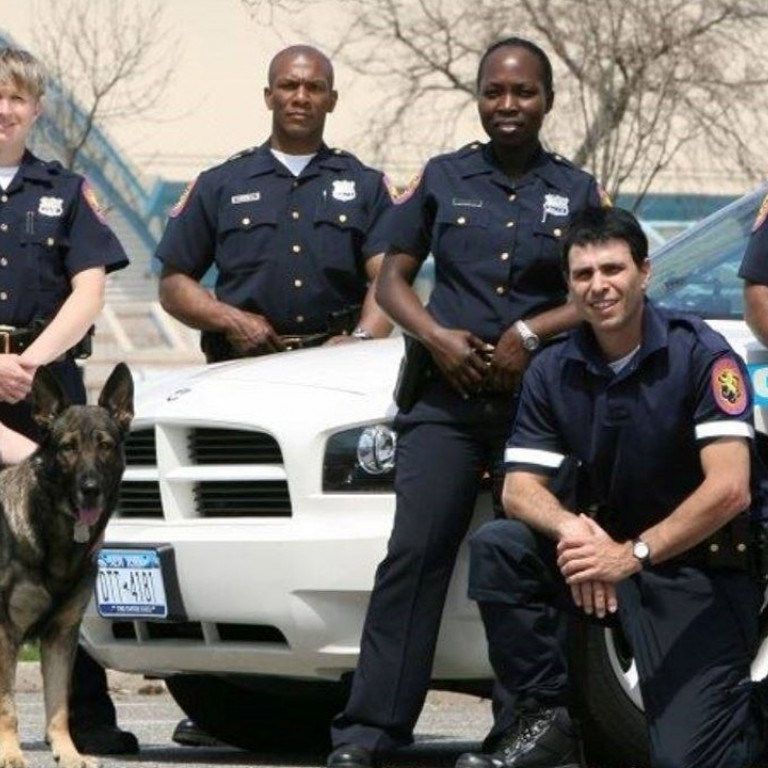


# Importing the relevant libraries and datasets

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

In [ ]:
df=pd.read_csv('../input/us-police-shootings/shootings.csv')
df.head()

# Data Wrangling

Let us first deal with the data on how to analyse it. We shall first start by dropping all the unnecessary columns. 

The columns such as id and name will not provide much information about our analysis. Hence, we shall simply drop it from our dataframe.

In [ ]:
df.drop('id',axis=1,inplace=True)
df.drop('name',axis=1,inplace=True)

Let us now check for any null values and the various datatypes we are dealing with. 

In [ ]:
df['Count']=1
df.isna().any()

Amazing ! The dataframe has no null entries. Let's take a quick peek at what our dataframes look like.

In [ ]:
df.info()

As expected, other than age column, the rest of the columns are all objects containing strings. Hence, no other data wrangling is necessary. We can proceed with the data visalisation aspect of our work now.


# Data Visualisation


## 1. Manner of deaths

Let us check how the manner of deaths stack up.

In [ ]:
sns.catplot('manner_of_death',data=df,kind='count',palette='summer',height=5,aspect=2)
plt.xlabel('Manner of death',size=15)
plt.ylabel('Number of cases',size=15)
plt.title('Classification of death',size=20)

As we can see, the cases primarily consist of shootings. Tasering is something that is usually quite difficult and needs the officers to be at dangerously close range to possibly armed offenders. Hence, under most cases, officers prefer to neutralise threats by shooting.

## 2. Age analysis

Let us see how the ages of the various offenders are distributed. This will give us an idea of which age groups are most vulnerable to crimes.

In [ ]:
fig1=plt.figure(figsize=(10,8))
ax1=fig1.add_subplot(121)
a=sns.distplot(df['age'])
plt.title('Age distribution of offenders shot',size=15)
a.axvline(df['age'].median(),color='red',label='Median age')
ax1.set_xlabel('Age',size=15)
ax1.legend()

ax2=fig1.add_subplot(122)
sns.violinplot(df['age'],inner='quartile',palette='summer',orient='v')
ax2.set_title('Median age:{}'.format(df['age'].median()),size=15)

As we can see, police shootings are higher for offenders with ages between 20-40. The median age of all the offenders shot is 35.

## Gender

Let us check which genders are more likely to get shot and be involved in crimes. Understanding this data helps police to take more precautions when dealing with offenders of a particular gender.

In [ ]:
df_gend=df.groupby('gender')['Count'].sum().reset_index()
plt.figure(figsize=(10,8))
labels=['Female','Male']
plt.pie(df_gend['Count'],autopct="%1.1f%%",explode=(0.2,0),labels=labels)
plt.title('Gender distribution of the shootings',size=20)

As we can see, a whopping 96.5 % offenders are males while only about 4.5 % are females. From this statistic, the police could afford to subdue and arrest the female offenders before planning on shooting. 


## Race of the offenders

Let us check what the races of each of the offenders are in the United States who got unfortunately shot to death.

In [ ]:

df_race=df.groupby('race')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)
df_race

fig2=go.Figure([go.Pie(labels=df_race['race'],values=df_race['Count'])])

fig2.update_traces(textfont_size=15,textinfo='value+percent')
fig2.update_layout(title='Shootings based on races',title_x=0.5,height=700,width=700)
fig2.show()

As we can see, almost more than half the number of shootings is of whites while about 26.5 % shootings is of black offenders. 

This is definitely contrary to popular belief which shows that the police had to shoot down more number of whites than blacks. This does indeed disprove the projections made by the media and the blacks that the police shot down mostly blacks. 

## Age groups based on race

Let us see how the median ages range for offenders of varying race.

In [ ]:
fig3=plt.figure(figsize=(15,8))
ax1=fig3.add_subplot(121)
ax1.set_title('Violinplot of ages based on race of offenders',size=15)
sns.violinplot(df['race'],df['age'],inner='quartile',palette='coolwarm',ax=ax1)
ax1.set_xlabel('Race',size=15)
ax1.set_ylabel('Age',size=15)
ax2=fig3.add_subplot(122)
sns.boxplot(df['race'],df['age'],palette='summer',ax=ax2)
ax2.set_title('Boxplot of ages based on race of offenders',size=15)
ax2.set_xlabel('Race',size=15)
ax2.set_ylabel('Age',size=15)

From the above plots, we see that the general median age ages of black offenders are lower than white offenders. This shows that blacks are involving themselves in crimes at a relatively younger age when compared to the rest of the races.

## Mental sickness association with race

Let us see if there is any correlation of mental sickness associated with race of the offenders.

In [ ]:
df_mental=df[df['signs_of_mental_illness']==True]
df_grouped=df_mental.groupby('race')['Count'].sum().reset_index()

In [ ]:
df_grouped

In [ ]:
fig4=go.Figure([go.Pie(labels=df_grouped['race'],values=df_grouped['Count'])])

fig4.update_traces(textfont_size=15,textinfo='value+percent')
fig4.update_layout(title='Mentally sick offenders based on race',title_x=0.5,height=700,width=700)
fig4.show()

About 64.6 % offenders who were shot with supposed mental sickness were whites followed by a much smaller percentage of Blacks and Hispanics (16.7 % and 14.2 % respectively)


## Threat level based on race

Let us check how the threal levels vary across each of the races.

In [ ]:
sns.catplot('race',kind='count',data=df,hue='threat_level',palette='viridis',height=8,aspect=2)
plt.xticks(size=15)
plt.xlabel('Race',size=20)
plt.yticks(size=15)
plt.ylabel('Count',size=20)
plt.title('Threat level of each of the races',size=25)
plt.legend(fontsize=15)


From the above plot, we can see that the threat level was highly dangerous for the whites and hence, had to be shot down. The blacks had a high threat level as well but overall, it was lower than the whites. 

When an offender starts attacking the police, they will have no option other than to neutralise the offender through a lethal shot.

This graph also shows that the police have been unbiased in their behaviour as they've treated each threat in the same manner irrespective of their race.


## Top 10 states with high shootings

Let us check which states have a high criminal shooting record.

In [ ]:
df_top10=df.groupby('city')['Count'].sum().reset_index().sort_values(by='Count',ascending=False)
df_top10=df_top10.head(10)
df_top10

In [ ]:
sns.catplot('city','Count',data=df_top10,kind='bar',aspect=2,height=8,palette='summer')
plt.xlabel('City',size=20)
plt.ylabel('Number of shootings',size=20)
plt.title('Top 10 cities with highest shootings',size=25)
plt.xticks(size=15)

We observe from the above plot that the state of LA has had the highest number of police shootings. LA is generally a rich state and hence, crimes are also expected to be higher here. 


## States with high number of police shootings

Using a choropleth map, we will try to see the states with high number of shootings against the black !

In [ ]:
df_black=df[df['race']=='Black']
df_black_grouped=pd.DataFrame(df_black['state'].value_counts())
df_black_grouped.reset_index(inplace=True)
df_black_grouped.rename(columns={'index':'state','state':'count'},inplace=True)

In [ ]:



fig = go.Figure(go.Choropleth(
    locations=df_black_grouped['state'],
    z=df_black_grouped['count'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=df_black_grouped['state'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Millions USD",showscale = False,
))
fig.update_layout(
    title_text='States with high black police shootings',
    title_x=0.5,
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'))

fig.show()

# If you find this notebook helpful, an upvote would be great ! :)